In [68]:
pip install nltk


In [79]:
pip install streamlit -q

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob


In [29]:
# @title
df=pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [30]:
df.shape

(1465, 16)

In [31]:
df.info()
#thus there are no numeric values all categorical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [38]:
# Drop columns only if they exist
df.drop(columns=[col for col in ['img_link', 'product_link', 'user_name'] if col in df.columns], inplace=True)


In [39]:
# Detect and drop null values
df.dropna(inplace=True)

In [40]:
# Convert price columns to float after removing currency symbols
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

In [42]:
# Remove non-numeric characters and handle missing values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['discount_percentage'] = (
    df['discount_percentage']
    .str.replace('%', '', regex=True)
    .astype(float)
)

df['rating_count'] = (
    df['rating_count']
    .str.replace(',', '', regex=True)
    .astype(float)
)


In [44]:
# Summary statistics
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1463.000000,1463.000000,1463.000000,1462.000000,1463.000000
mean,3129.277122,5451.068544,47.650718,4.096717,18295.541353
std,6948.222850,10881.018448,21.622373,0.289497,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1186.000000
50%,799.000000,1690.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4312.500000,63.000000,4.300000,17336.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [45]:
# Detect and Remove Outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying to relevant numerical columns
numeric_cols = ['discounted_price', 'actual_price', 'rating', 'rating_count', 'discount_percentage']
for col in numeric_cols:
    df = remove_outliers_iqr(df, col)


In [46]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


# **EDA**

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


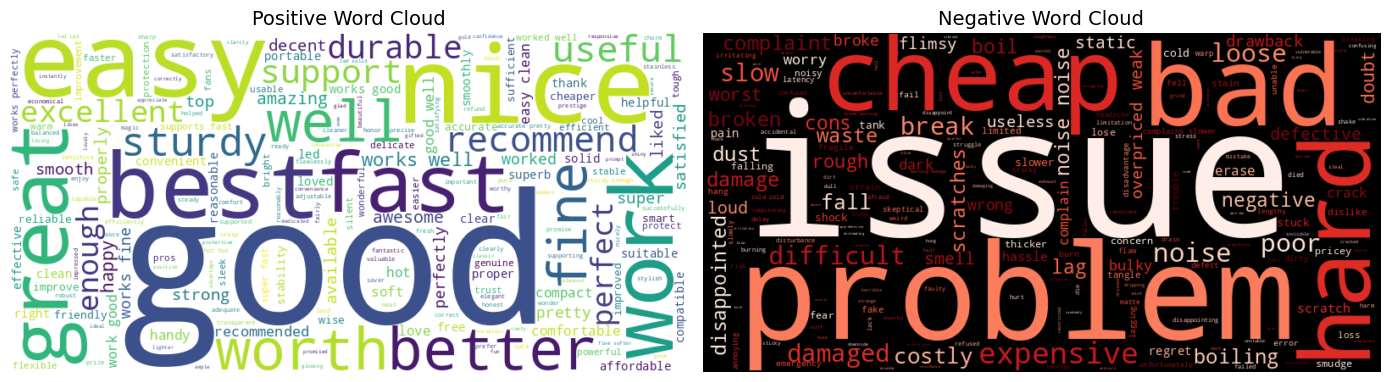

In [54]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

# Load positive and negative words from the opinion lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Combine all reviews into one string
all_reviews = ' '.join(df['review_content'].dropna())

# Tokenize words
tokens = word_tokenize(all_reviews.lower())

# Separate words into positive and negative lists
pos_words = [word for word in tokens if word in positive_words]
neg_words = [word for word in tokens if word in negative_words]

# Create word clouds
pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(pos_words))
neg_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(' '.join(neg_words))

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(pos_wordcloud, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Word Cloud', fontsize=14)

axes[1].imshow(neg_wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Word Cloud', fontsize=14)

plt.tight_layout()
plt.show()


In [56]:
#HIGHEST RATED PRODUCTS OF THE YEAR
# Step 1: Sort by rating in descending order
df_sorted = df.sort_values(by='rating', ascending=False)

In [57]:

# Step 2: Filter top N products (e.g., top 3)
top_n = 10
top_rated_products = df_sorted.head(top_n)

In [58]:
top_rated_products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_id,review_title,review_content
1201,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,0.060606,0.089303,0.468085,1.000000,0.000660,-Make delicious milk foam creamer for your dri...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...","Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an..."
1223,B0BM4KTNL1,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,0.166667,0.302854,0.595745,0.933333,0.047416,【Rechargeable Multi-Function Milk Frother】The ...,"AGMHHTX7GPWHZAUTEYQOFEEDFMDQ,AEJJGJQCIEPL3ZBNU...","R1YXOQ6ZZI33LZ,R17FVMZGPYPOYZ,R23NCERA0R891T,R...","Nice product,Not as effective as claimed, just...","Value for money,Not as effective as claimed, j..."
1275,B0BM9H2NY9,Multifunctional 2 in 1 Electric Egg Boiling St...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,0.166667,0.302854,0.595745,0.933333,0.063112,Egg Frying Pan,"AFZ2YKWX4KR7MWSA6UOMEGGHT32A,AEP6WZ7AR6XDQSBFS...","R2DHTJGY77MOP0,R36IXNHZC037AW,R3GPHUMRV75VWK,R...","Amazing! Value for money!,Very easy to use,2 i...","Worth buying for eggetarians,Working great so ..."
1226,B0BLC2BYPX,Zuvexa USB Rechargeable Electric Foam Maker - ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,0.116162,0.244613,0.659574,0.933333,0.001374,The food taste stainless steel whisking head i...,"AG6AS2KLLZMPPPEKF5RIJXTMA4FA,AEW6BC4YLRYKI5OZG...","R1M11VMLH6I3TN,R2OLOOGNHQ37ZA,R3PIVKT8BNMA4G,R...","Little kitchen helper,An amazing product,Very ...",The first time I tried it send the eggs and th...
1388,B0BP89YBC1,Campfire Spring Chef Prolix Instant Portable W...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",0.368687,0.671908,0.606383,0.933333,0.071111,Prolix Auto cut off feature: It is available w...,"AEVX4JV3C4QR3Y3V3RJXQ2WZAR4Q,AHR5JZBK66QYZSEJ3...","RBPM3YRVWMMMK,RVY7BZCJPHJZU,R3KXHKIGWPT7IS,R1K...","Felt very useful 👌 but cable is short,Good in ...","I like instant heating, I didn't get warranty ..."
459,B0B23LW7NV,Spigen EZ Fit Tempered Glass Screen Protector ...,Electronics|Mobiles&Accessories|MobileAccessor...,0.242424,0.555232,0.702128,0.933333,0.213716,Compatibility ; Glass Screen Protector Compati...,"AGQIXFPHABUZ2WPETGRYDB7VSMXA,AECPF7WFMUQ3TR7YT...","R13CIOIUD1D8UM,R17AIJTSM1FUNS,R3AJ1T3JVA8O9V,R...","Easy to install,Best screen guard and the easi...",It is easy to install at home. The kit has all...
468,B0B244R4KB,Spigen EZ Fit Tempered Glass Screen Protector ...,Electronics|Mobiles&Accessories|MobileAccessor...,0.242424,0.555232,0.702128,0.866667,0.168362,Compatibility ; Glass Screen Protector Compati...,"AHCJOEQEARI6IQ2XGJ6HTGQSRUXQ,AGBUKPO3CSYIJA4C4...","R3C2WT83DOSL8U,R1GKC3NL9J667A,R2EQZSSQHG60ET,R...","Best For It’s Money!🔥,Nice quality, but comes ...",It’s A Good Purchase For Long term Personally ...
571,B0B9BXKBC7,"WeCool S5 Long Selfie Stick, with Large Reinfo...",Electronics|Mobiles&Accessories|MobileAccessor...,0.444444,0.768783,0.585106,0.866667,0.006625,"64"" Tall Cell Phone Tripods with 7 section adj...","AFPYH3UF3GB4RNX3MX46AXFM2FTQ,AGWEQHJSUA4YCG44R...","R2MI4KSWYUEMDR,R2MNYKDL2UII1M,R2C6TUBM6IVLB0,R...","Good,Good Product but Little expensive.,Happy ...","Good,Thoda sa kam stable hai, phone lagane ke ..."
137,B08TGG316Z,"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...","Electronics|HomeTheater,TV&Video|Accessories|C...",0.242424,0.458163,0.617021,0.866667,0.100605,Certified HDMI Cable: The package has an offic...,"AFO7T5DJCA34LXNLPEMNTUPHBA3Q,AEOKQXQO42VI27RS7...","R1482M3Z6TF62M,RX9ISCNT5KUMA,RY1MX82BJD2VD","Fantastic Ultra High Speed HDMI cable,Amazing ...",Absolutely value for money. I connect it with ...
1216,B0BN6M3TCM,"VRPRIME Lint Roller Lint Remover for Clothes, ...","Home&Kitchen|Kitchen&HomeAppliances

In [59]:
print(top_rated_products[['product_name','rating','category']])

                                           product_name    rating  \
1201  Oratech Coffee Frother electric, milk frother ...  1.000000   
1223  FIGMENT Handheld Milk Frother Rechargeable, 3-...  0.933333   
1275  Multifunctional 2 in 1 Electric Egg Boiling St...  0.933333   
1226  Zuvexa USB Rechargeable Electric Foam Maker - ...  0.933333   
1388  Campfire Spring Chef Prolix Instant Portable W...  0.933333   
459   Spigen EZ Fit Tempered Glass Screen Protector ...  0.933333   
468   Spigen EZ Fit Tempered Glass Screen Protector ...  0.866667   
571   WeCool S5 Long Selfie Stick, with Large Reinfo...  0.866667   
137   10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...  0.866667   
1216  VRPRIME Lint Roller Lint Remover for Clothes, ...  0.866667   

                                               category  
1201  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...  
1223  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...  
1275  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...  
1226  Ho

<ipython-input-60-e3105ac73c21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated_products, x='product_id', y='rating', palette='Blues_r')


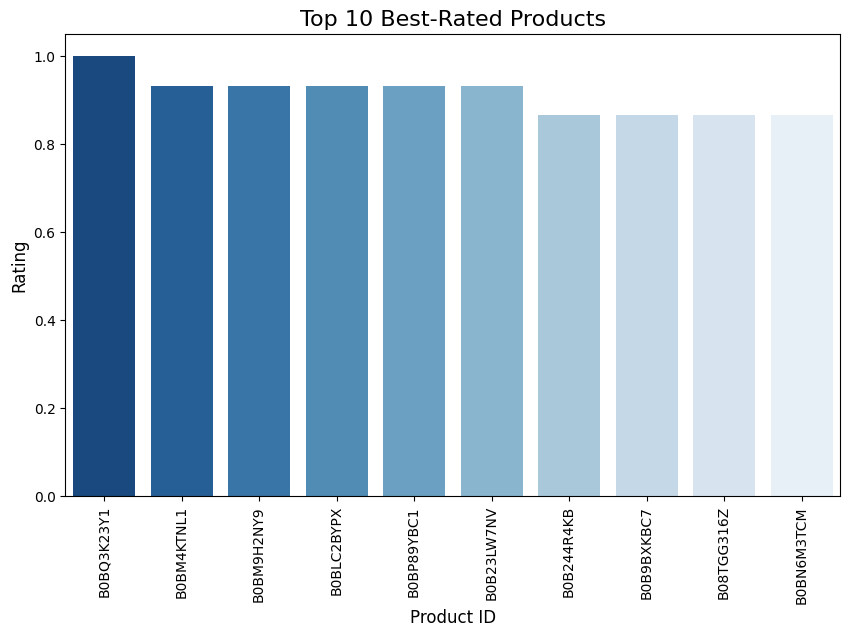

In [60]:
# Top Rated Products
df_sorted = df.sort_values(by='rating', ascending=False)
top_n = 10
top_rated_products = df_sorted.head(top_n)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated_products, x='product_id', y='rating', palette='Blues_r')
plt.xticks(rotation=90)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title(f'Top {top_n} Best-Rated Products', fontsize=16)
plt.show()


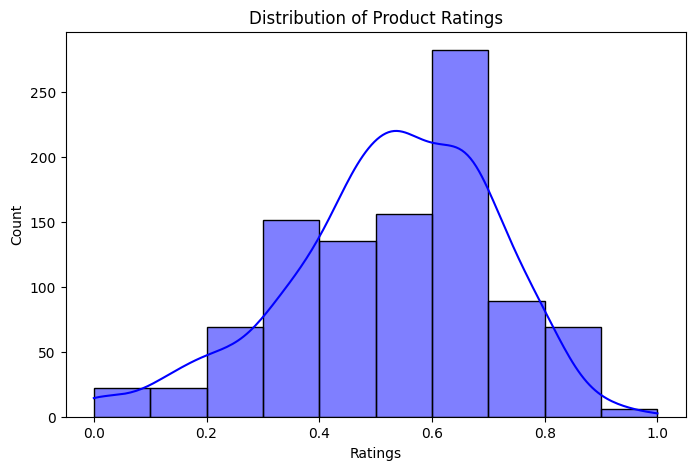

In [61]:
# 1. Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=10, kde=True, color='blue')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Product Ratings')
plt.show()

<ipython-input-63-702624be6351>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")


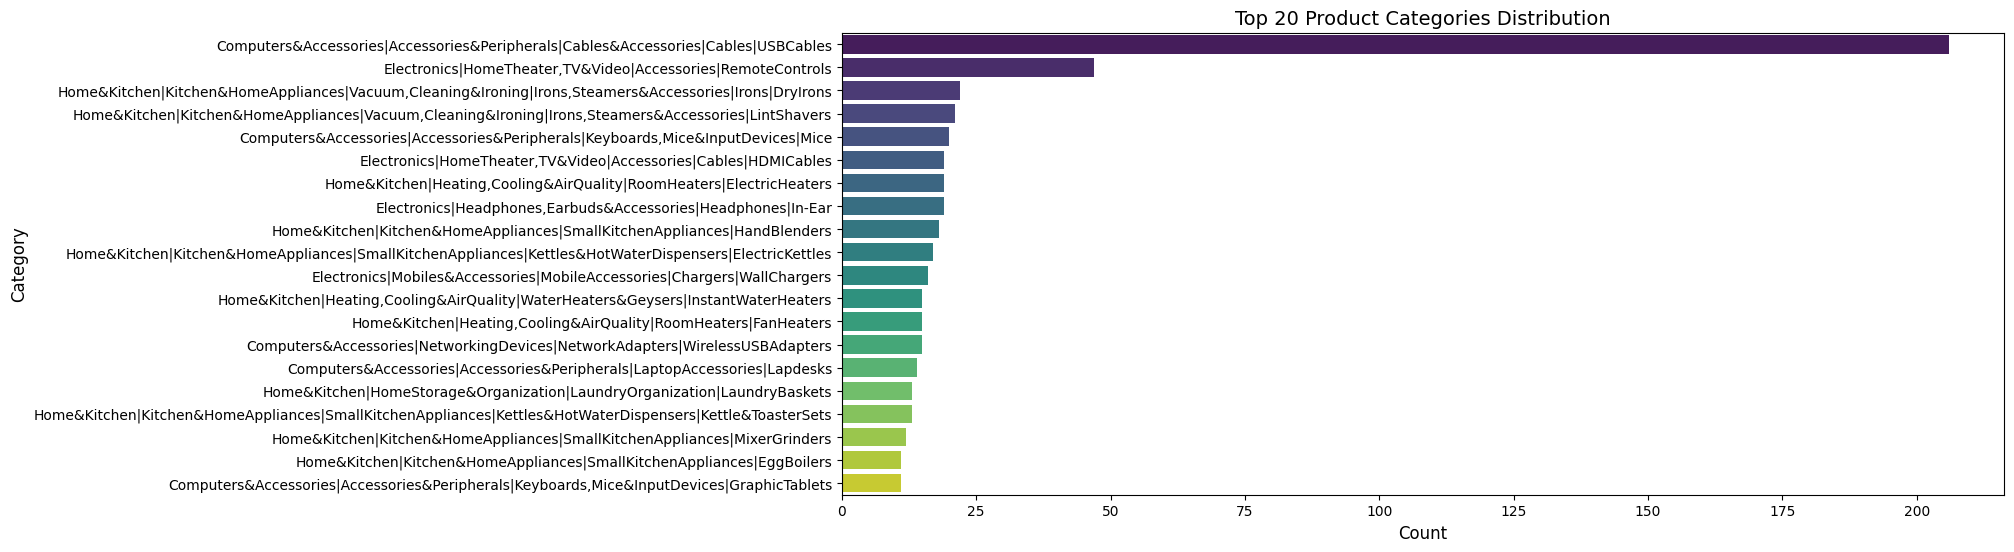

In [63]:
# 3. Category Distribution

plt.figure(figsize=(15, 6))
top_categories = df['category'].value_counts().head(20)  # Show only top 20 categories
sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Top 20 Product Categories Distribution', fontsize=14)
plt.show()


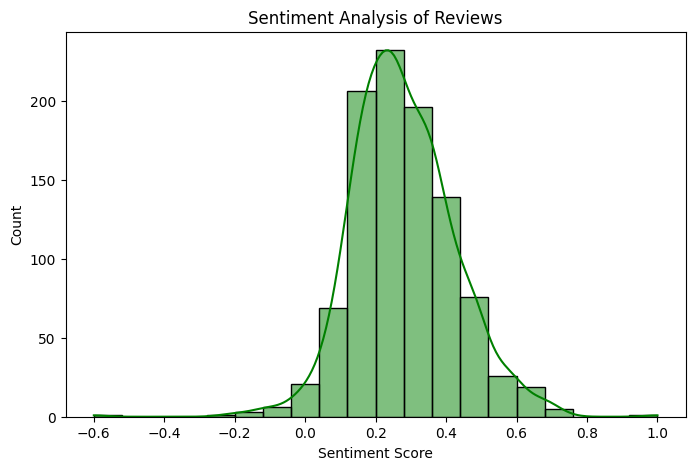

In [64]:
# 4. Sentiment Analysis of Reviews
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['review_content'].dropna().apply(get_sentiment)
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment_score'], bins=20, kde=True, color='green')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Reviews')
plt.show()

<ipython-input-65-65250c85680c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['rating_bin'], y=df['discounted_price'], palette="magma")


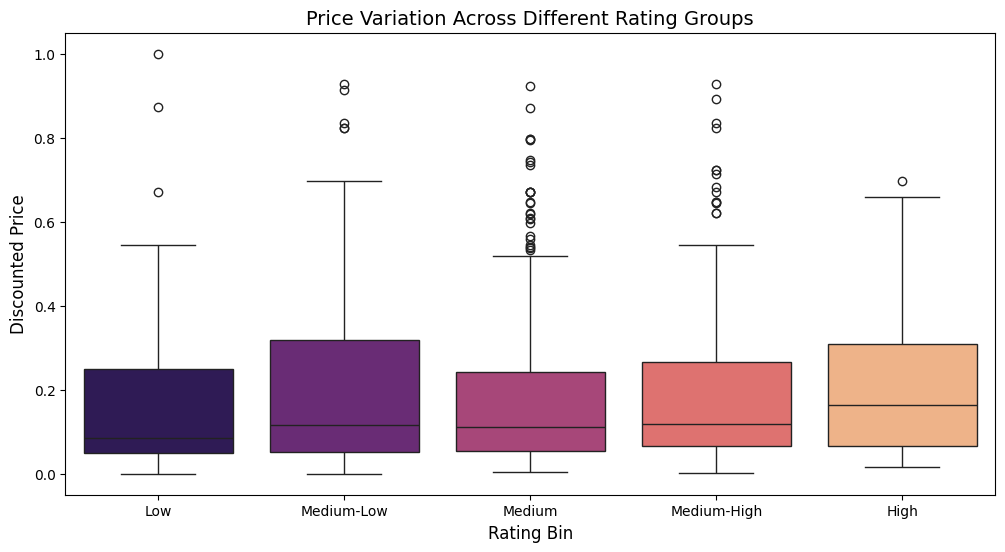

In [65]:
df['rating_bin'] = pd.cut(df['rating'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['rating_bin'], y=df['discounted_price'], palette="magma")
plt.xlabel('Rating Bin', fontsize=12)
plt.ylabel('Discounted Price', fontsize=12)
plt.title('Price Variation Across Different Rating Groups', fontsize=14)
plt.show()
